# Step by Step guide on How to Plot U chart

U chart is a control chart of Attribute data, it is used to monitor number of Non Conforming items per unit, U chart is used instead of C chart if the Sub group size varies, for Example, If a hospital wants to know the number of new patients who already contract a particular before diagnosing them, In this case since the number of patients who visits the hospital daily varies, then U chart can be used. 

In [1]:
#Importing required package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

Let's generate a random sample of 50 observations, we're assuming that the sample size varies.

In [2]:
#creating an empty list
no_of_nonconform = []
#creating an empty list 
sample_num = []
#Sample sizes
n = []
count = 1
for i in range(0,50):
    no_of_nonconform.append(random.randint(2,22))
    sample_num.append(count)
    count+=1
    n.append(random.randint(50,80))
#Creating the dataframe
df = pd.DataFrame({'sample_num' : sample_num,'sample_size': n,'no_of_nonconform':no_of_nonconform})
df

,sample_num,sample_size,no_of_nonconform
0,1,79,9
1,2,64,14
2,3,63,10
3,4,61,9
4,5,65,15
5,6,78,11
6,7,70,3
7,8,65,20
8,9,51,16
9,10,58,4


To get the value for U, we're to divide the number of Non Conforming items in each subgroup by their Sample Size.

i.e Ui = Ci/ni

In [3]:
df['u'] = df.no_of_nonconform/ df.sample_size

# Next, we need to Obtain U_bar:

This Obtained by:

u_bar = C / n

C = Is the sum of all the Non Conforming items per inspection unit.

n = sample size for all the subgroup sub

In [4]:
C = df.no_of_nonconform.sum()
n = df.sample_size.sum()

In [5]:
#Finding u_bar
u_bar = C/n

## The control limits for U charts can be calculated thus:

The UCL and LCL of a U chart varies for each subgroup.

UCL = u_bar + 3(square_root(u_bar/ni)

LCL = max(0,u_bar + 3(square_root(u_bar/ni))

where ni is the individual subgroup size.

Now, lets create the UCL and LCL for this dataset

In [6]:
df['UCL'] = u_bar + (3* np.sqrt(u_bar/df.sample_size))

In [7]:
for a in range(df.shape[0]):
    lcl = u_bar - (3* np.sqrt(u_bar/df.sample_size[a]))  
    df.loc[a,'LCL'] = max(0,lcl)

In [8]:
df

,sample_num,sample_size,no_of_nonconform,u,UCL,LCL
0,1,79,9,0.113924,0.321591,0.036107
1,2,64,14,0.218750,0.337439,0.020260
2,3,63,10,0.158730,0.338692,0.019006
3,4,61,9,0.147541,0.341292,0.016407
4,5,65,15,0.230769,0.336214,0.021484
5,6,78,11,0.141026,0.322503,0.035195
6,7,70,3,0.042857,0.330490,0.027208
7,8,65,20,0.307692,0.336214,0.021484
8,9,51,16,0.313725,0.356505,0.001193
9,10,58,4,0.068966,0.345440,0.012258


U chart is displayed by plotting the Sample Number against the U values.

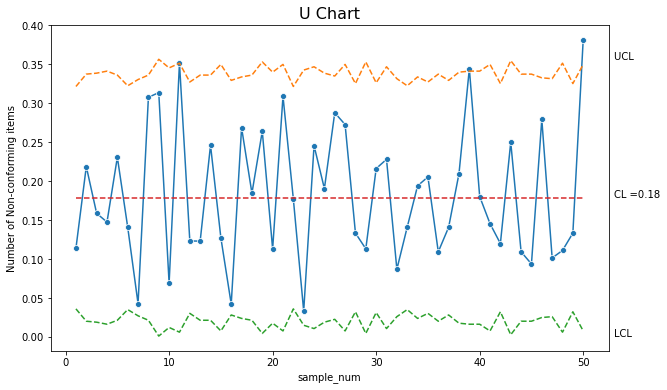

In [9]:
plt.figure(figsize = [10,6])
sns.lineplot(data = df, x = 'sample_num', y = 'u', marker = 'o')
sns.lineplot(data = df, x = 'sample_num', y = 'UCL',linestyle = 'dashed')
sns.lineplot(data = df, x = 'sample_num', y =  'LCL',linestyle = 'dashed')
sns.lineplot(data = df, x = 'sample_num', y = u_bar,linestyle = 'dashed')
plt.text(df.sample_num.max() + 3,df['LCL'].min(), 'LCL')
plt.text(df.sample_num.max() + 3,df['UCL'].max(),'UCL ')
plt.text(df.sample_num.max() + 3,u_bar,'CL =' + str(round(u_bar,2)))
plt.title('U Chart',fontsize = 16);
#plt.xticks(range(min(df['sample_num']),max(df['sample_num'])+1));
plt.ylabel('Number of Non-conforming items')
plt.show()